Import imp libs

In [1]:
import pandas as pd
import numpy as np

from sklearn import datasets, model_selection

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

load and understand dataset

In [2]:
diabetes = datasets.load_diabetes()

In [3]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
X = diabetes.data
Y = diabetes.target

In [5]:
df = pd.DataFrame(X)
print(diabetes.feature_names)
df.columns = diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [6]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


Spit into train, test

In [7]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(331, 10)
(111, 10)
(331,)
(111,)


Train model

In [8]:
algo = LinearRegression()
algo.fit(X_train, Y_train)

LinearRegression()

Get Predictions

In [9]:
Y_predict = algo.predict(X_test)

In [10]:
Y_predict.shape, Y_test.shape

((111,), (111,))

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

predicted_y_train = algo.predict(X_train)
rmse_train = (np.sqrt(mean_squared_error(Y_train, predicted_y_train)))
r2_train = r2_score(Y_train, predicted_y_train)

rmse_test = (np.sqrt(mean_squared_error(Y_test, Y_predict)))
r2_test = r2_score(Y_test, Y_predict)

score = algo.score(X_test, Y_test)

rmse_train, r2_train, rmse_test, r2_test, score

(54.628279234679226,
 0.49945103293108994,
 50.37687228988368,
 0.5644833184243856,
 0.5644833184243856)

(0.0, 300.0, 0.0, 300.0)

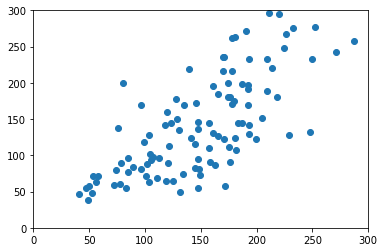

In [12]:
plt.scatter(Y_predict, Y_test)
plt.axis([0, 300, 0, 300])